In [48]:
#импортируем необходимые модули
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import time
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from math import log

In [101]:
#считываем таблицу с признаками
features = pd.read_csv('./features.csv', index_col='match_id')


In [6]:
#выделяем столбец с целевой переменной
y = features['radiant_win']


In [7]:
#удаялем признаки, отсутствующие в тестовой выборке, формируем тренировочную выборку
X = features.drop(['duration', 'radiant_win', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire'], axis='columns')

In [8]:
#проверяеме выборку на наличие пропусков 
features.count()

start_time                     97230
lobby_type                     97230
r1_hero                        97230
r1_level                       97230
r1_xp                          97230
r1_gold                        97230
r1_lh                          97230
r1_kills                       97230
r1_deaths                      97230
r1_items                       97230
r2_hero                        97230
r2_level                       97230
r2_xp                          97230
r2_gold                        97230
r2_lh                          97230
r2_kills                       97230
r2_deaths                      97230
r2_items                       97230
r3_hero                        97230
r3_level                       97230
r3_xp                          97230
r3_gold                        97230
r3_lh                          97230
r3_kills                       97230
r3_deaths                      97230
r3_items                       97230
r4_hero                        97230
r

In [9]:
# названия признаков, имеющих пропуски с обоснованиями
'''
first_blood_time - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
first_blood_team - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
first_blood_player1 - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
first_blood_player2 - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
radiant_bottle_time - время первого приобретения командой предмета "bottle", пусто если не приобрели          
radiant_courier_time - время приобретения предмета "courier", пусто если не приобрели          
radiant_flying_courier_time время приобретения предмета "flying_courier"
radiant_first_ward_time   время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля, пусто если не установили      
dire_bottle_time               
dire_courier_time              
dire_flying_courier_time 
dire_first_ward_time
'''

'\nfirst_blood_time - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение\nfirst_blood_team - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение\nfirst_blood_player1 - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение\nfirst_blood_player2 - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение\nradiant_bottle_time - время первого приобретения командой предмета "bottle", пусто если не приобрели          \nradiant_courier_time - время приобретения предмета "courier", пусто если не приобрели          \nradiant_flying_courier_time время приобретения предмета "flying_courier"\nradiant_first_ward_time   время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля, пусто если не установили      \ndire_bottle_time     

In [10]:
#заменяем пропщенные значения на -1
X.fillna(inplace=True, value = -1)

In [11]:
#проверяем отсутствие пропусков
X.count()

start_time                     97230
lobby_type                     97230
r1_hero                        97230
r1_level                       97230
r1_xp                          97230
r1_gold                        97230
r1_lh                          97230
r1_kills                       97230
r1_deaths                      97230
r1_items                       97230
r2_hero                        97230
r2_level                       97230
r2_xp                          97230
r2_gold                        97230
r2_lh                          97230
r2_kills                       97230
r2_deaths                      97230
r2_items                       97230
r3_hero                        97230
r3_level                       97230
r3_xp                          97230
r3_gold                        97230
r3_lh                          97230
r3_kills                       97230
r3_deaths                      97230
r3_items                       97230
r4_hero                        97230
r

In [12]:
#Какой столбец содержит целевую переменную? Запишите его название - radiant_win   

In [14]:
#создаем генератор разбиений для кросс-валидации по 5 блокам
cv = KFold(n_splits=5, shuffle=True)

In [44]:
#Подход 1: градиентный бустинг "в лоб"
#оцениваем качество градиентного бустинга для количества деревьев:10,20,30,40,50,60,70,80,90,100
test_score = []
for n_estimators in [10,20,30,40,50,60,70,80,90,100]:
    start_time = datetime.datetime.now()
    clf = GradientBoostingClassifier(n_estimators=n_estimators)
    scores = cross_validate(estimator=clf,X=X,y=y,cv=cv,scoring='roc_auc')
    test_score.append(scores['test_score'].mean())
    print(n_estimators, scores['test_score'].mean(), 'Time elapsed:', datetime.datetime.now() - start_time)

    

10 0.6644374604049086 Time elapsed: 0:01:04.933493
20 0.682614833565711 Time elapsed: 0:01:51.209187
30 0.6891174622574201 Time elapsed: 0:02:58.790808
40 0.6943399098836776 Time elapsed: 0:03:59.644321
50 0.6973996762674499 Time elapsed: 0:05:00.868931
60 0.7000964864103268 Time elapsed: 0:05:52.563666
70 0.7023108430114036 Time elapsed: 0:07:24.979482
80 0.7043228053958092 Time elapsed: 0:07:46.899865
90 0.7053205562621849 Time elapsed: 0:09:08.267337
100 0.7069547869190473 Time elapsed: 0:10:28.812481


In [60]:
from matplotlib import pyplot

ValueError: x and y must have same first dimension, but have shapes (10,) and (110,)

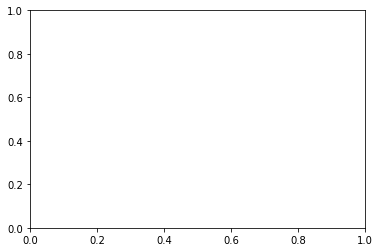

In [61]:
pyplot.plot([10,20,30,40,50,60,70,80,90,100],test_score )

In [19]:
'''
1. first_blood_time, first_blood_team  - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
2. 'radiant_win'
3. время 0:01:16.010437, качество 0.6897171100684416
4.имеет, модель с 40 деревьями дает прирост точности 6,5%, с 50 - прирост 10,7%. Для ускорения обучения можно уменьшить значение параметра max_depth
'''

'\n1. first_blood_time, first_blood_team  - Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение\n2. \'radiant_win\'\n3. время 0:01:16.010437, качество 0.6897171100684416\n4.имеет, модель с 40 деревьями дает прирост точности 6,5%, с 50 - прирост 10,7%. Для ускорения обучения можно уменьшить значение параметра max_depth\n'

In [46]:
#Подход 2: логистическая регрессия
#создаем сетку для оценки параметра С
grid = { 'C' : np.power( 10.0, np.arange(-100,10 ))}
grid

{'C': array([1.e-100, 1.e-099, 1.e-098, 1.e-097, 1.e-096, 1.e-095, 1.e-094,
        1.e-093, 1.e-092, 1.e-091, 1.e-090, 1.e-089, 1.e-088, 1.e-087,
        1.e-086, 1.e-085, 1.e-084, 1.e-083, 1.e-082, 1.e-081, 1.e-080,
        1.e-079, 1.e-078, 1.e-077, 1.e-076, 1.e-075, 1.e-074, 1.e-073,
        1.e-072, 1.e-071, 1.e-070, 1.e-069, 1.e-068, 1.e-067, 1.e-066,
        1.e-065, 1.e-064, 1.e-063, 1.e-062, 1.e-061, 1.e-060, 1.e-059,
        1.e-058, 1.e-057, 1.e-056, 1.e-055, 1.e-054, 1.e-053, 1.e-052,
        1.e-051, 1.e-050, 1.e-049, 1.e-048, 1.e-047, 1.e-046, 1.e-045,
        1.e-044, 1.e-043, 1.e-042, 1.e-041, 1.e-040, 1.e-039, 1.e-038,
        1.e-037, 1.e-036, 1.e-035, 1.e-034, 1.e-033, 1.e-032, 1.e-031,
        1.e-030, 1.e-029, 1.e-028, 1.e-027, 1.e-026, 1.e-025, 1.e-024,
        1.e-023, 1.e-022, 1.e-021, 1.e-020, 1.e-019, 1.e-018, 1.e-017,
        1.e-016, 1.e-015, 1.e-014, 1.e-013, 1.e-012, 1.e-011, 1.e-010,
        1.e-009, 1.e-008, 1.e-007, 1.e-006, 1.e-005, 1.e-004, 1.e-003,
 

In [47]:
#оцениваем качество логистической регрессии с L2-регуляризацией
test_score = []
start_time = datetime.datetime.now()
clf = LogisticRegression(penalty='l2', solver='lbfgs')
gs = GridSearchCV(clf, grid, cv=cv, scoring='roc_auc')
gs.fit(X=X, y=y)
best_c = gs.best_params_['C']
print(best_c)
for C in grid['C']:
    clf_opt_C = LogisticRegression(penalty='l2', C=C, solver='lbfgs')
    scores = cross_validate(estimator=clf_opt_C,X=X,y=y,cv=cv,scoring='roc_auc')
    test_score.append(scores['test_score'].mean())
    print('C = ', C, 'best_c = ', best_c , scores['test_score'].mean(), 'Time elapsed:', datetime.datetime.now() - start_time)


1e-21
C =  1e-100 best_c =  1e-21 0.5 Time elapsed: 0:06:55.270839
C =  1e-99 best_c =  1e-21 0.5 Time elapsed: 0:06:58.231331
C =  1e-98 best_c =  1e-21 0.5 Time elapsed: 0:07:01.626936
C =  1e-97 best_c =  1e-21 0.5 Time elapsed: 0:07:04.609105
C =  1e-96 best_c =  1e-21 0.5 Time elapsed: 0:07:07.621851
C =  1e-95 best_c =  1e-21 0.5 Time elapsed: 0:07:10.631522
C =  1e-94 best_c =  1e-21 0.5 Time elapsed: 0:07:13.559890
C =  1e-93 best_c =  1e-21 0.5 Time elapsed: 0:07:16.693123
C =  1e-92 best_c =  1e-21 0.5 Time elapsed: 0:07:19.893866
C =  1e-91 best_c =  1e-21 0.5 Time elapsed: 0:07:22.768628
C =  1e-90 best_c =  1e-21 0.5 Time elapsed: 0:07:26.192995
C =  1e-89 best_c =  1e-21 0.5 Time elapsed: 0:07:29.397860
C =  1e-88 best_c =  1e-21 0.5 Time elapsed: 0:07:32.285572
C =  1e-87 best_c =  1e-21 0.5 Time elapsed: 0:07:35.055001
C =  1e-86 best_c =  1e-21 0.5 Time elapsed: 0:07:38.319543
C =  1e-85 best_c =  1e-21 0.5 Time elapsed: 0:07:41.659408
C =  1e-84 best_c =  1e-21 0.5 Ti

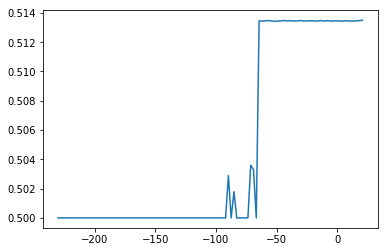

In [49]:
pyplot.plot([log(X) for X in grid['C']],test_score )

In [27]:
#создаем выборку без категориальных значений
no_categorials = features.drop(['lobby_type',
'r1_hero',
'r1_level',
'r1_xp',
'r1_gold',
'r1_lh',
'r1_kills',
'r1_deaths',
'r1_items',
'r2_hero',	
'r2_level',
'r2_xp',
'r2_gold',	
'r2_lh',
'r2_kills',
'r2_deaths',
'r2_items',
'r3_hero',
'r3_level',
'r3_xp',
'r3_gold',
'r3_lh',
'r3_kills',
'r3_deaths',
'r3_items',
'r4_hero',
'r4_level',
'r4_xp',
'r4_gold',
'r4_lh',
'r4_kills',
'r4_deaths',
'r4_items',
'r5_hero',
'r5_level',
'r5_xp',
'r5_gold',
'r5_lh',
'r5_kills',
'r5_deaths',
'r5_items',
'd1_hero',
'd1_level',
'd1_xp',
'd1_gold',
'd1_lh',
'd1_kills',
'd1_deaths',
'd1_items',
'd2_hero',
'd2_level',
'd2_xp',
'd2_gold',
'd2_lh',
'd2_kills',
'd2_deaths',
'd2_items',
'd3_hero',
'd3_level',
'd3_xp',
'd3_gold',
'd3_lh',
'd3_kills',
'd3_deaths',
'd3_items',
'd4_hero',
'd4_level',
'd4_xp',
'd4_gold',	
'd4_lh',
'd4_kills',
'd4_deaths',
'd4_items',
'd5_hero',
'd5_level',
'd5_xp',
'd5_gold',
'd5_lh',
'd5_kills',
'd5_deaths',
'd5_items'
], axis='columns')

In [29]:
#для логистической регресии заполняем пропуски значениями 0
no_categorials.fillna(inplace=True, value = 0)

In [95]:
#оцениваем качество логистической регрессии с L2-регуляризацией на выборке без категориальныъх значений 
test_score = []
start_time = datetime.datetime.now()
clf = LogisticRegression(penalty='l2', solver='lbfgs')
gs = GridSearchCV(clf, grid, cv=cv, scoring='roc_auc')
gs.fit(X=no_categorials, y=y)
best_c = gs.best_params_['C']
print(best_c)
for C in grid['C']:
    clf_opt_C = LogisticRegression(penalty='l2', C=C, solver='lbfgs')
    scores = cross_validate(estimator=clf_opt_C,X=no_categorials,y=y,cv=cv,scoring='roc_auc')
    test_score.append(scores['test_score'].mean())
    print('C = ', C, 'best_c = ', best_c , scores['test_score'].mean(), 'Time elapsed:', datetime.datetime.now() - start_time)

KeyboardInterrupt: 

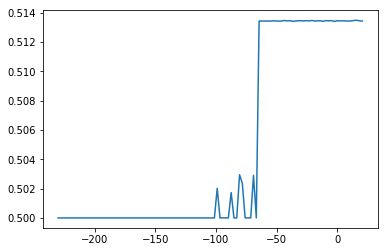

In [52]:
pyplot.plot([log(X) for X in grid['C']],test_score )

In [32]:
#выбираем уникальные идентификаторы героев
heroes = list(np.unique(features[['r1_hero', 'r2_hero','r3_hero','r4_hero', 'r5_hero','d1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']].values))

In [45]:
#уникальных идентификаторов героев - 108
len(heroes)

108

In [33]:
#создаем нулевую матрицу для мешка слов
X_pick = np.zeros((features.shape[0], 108))
X_pick.shape

(97230, 108)

In [34]:
#заполняем нулевую матрицу значениями 1 для игроков Radiant и -1 для Dire
for i, match_id in enumerate(features.index):
    for p in range(5):
        X_pick[i, heroes.index(features.loc[match_id, 'r%d_hero' % (p+1)])] = 1
        X_pick[i, heroes.index(features.loc[match_id, 'd%d_hero' % (p+1)])] = -1
        

In [35]:
#создаем DataFrame для мешка слов
heroes_matches = pd.DataFrame(X_pick, columns=heroes)
heroes_matches['match_id'] = features.index
heroes_matches.shape

(97230, 109)

In [36]:
#добавлем индекс с идентификатором матча для последующего обьединения с тренировочной выборкой
heroes_matches.index  = heroes_matches['match_id']

In [37]:
#объединяем мешок слов с тренировочной выборкой без категориальных признаков
no_categorials_heroes = no_categorials.merge(heroes_matches, left_index=True, right_index=True)

In [38]:
##для логистической регресии заполняем пропуски значениями 0
no_categorials_heroes.fillna(inplace=True, value = 0)
no_categorials_heroes.count()

start_time                     97230
first_blood_time               97230
first_blood_team               97230
first_blood_player1            97230
first_blood_player2            97230
radiant_bottle_time            97230
radiant_courier_time           97230
radiant_flying_courier_time    97230
radiant_tpscroll_count         97230
radiant_boots_count            97230
radiant_ward_observer_count    97230
radiant_ward_sentry_count      97230
radiant_first_ward_time        97230
dire_bottle_time               97230
dire_courier_time              97230
dire_flying_courier_time       97230
dire_tpscroll_count            97230
dire_boots_count               97230
dire_ward_observer_count       97230
dire_ward_sentry_count         97230
dire_first_ward_time           97230
duration                       97230
radiant_win                    97230
tower_status_radiant           97230
tower_status_dire              97230
barracks_status_radiant        97230
barracks_status_dire           97230
1

In [54]:
#оцениваем качество логистической регрессии с L2-регуляризацией на выборке без категориальныъх значений с добавленным мешком слов
test_score = []
start_time = datetime.datetime.now()
clf = LogisticRegression(penalty='l2', solver='lbfgs')
gs = GridSearchCV(clf, grid, cv=cv, scoring='roc_auc')
gs.fit(X=no_categorials_heroes, y=y)
best_c = gs.best_params_['C']
print(best_c)
for C in grid['C']:
    clf_opt_C = LogisticRegression(penalty='l2', C=C, solver='lbfgs')
    scores = cross_validate(estimator=clf_opt_C,X=no_categorials_heroes,y=y,cv=cv,scoring='roc_auc')
    test_score.append(scores['test_score'].mean())
    print('C = ', C, 'best_c = ', best_c , scores['test_score'].mean(), 'Time elapsed:', datetime.datetime.now() - start_time)

1e-28
C =  1e-100 best_c =  1e-28 0.5 Time elapsed: 0:08:08.494285
C =  1e-99 best_c =  1e-28 0.5 Time elapsed: 0:08:12.234908
C =  1e-98 best_c =  1e-28 0.5 Time elapsed: 0:08:15.761255
C =  1e-97 best_c =  1e-28 0.5 Time elapsed: 0:08:19.733292
C =  1e-96 best_c =  1e-28 0.5 Time elapsed: 0:08:23.124966
C =  1e-95 best_c =  1e-28 0.5 Time elapsed: 0:08:27.350646
C =  1e-94 best_c =  1e-28 0.5 Time elapsed: 0:08:31.562462
C =  1e-93 best_c =  1e-28 0.5 Time elapsed: 0:08:35.574872
C =  1e-92 best_c =  1e-28 0.5 Time elapsed: 0:08:39.813280
C =  1e-91 best_c =  1e-28 0.5 Time elapsed: 0:08:43.720372
C =  1e-90 best_c =  1e-28 0.5 Time elapsed: 0:08:47.847282
C =  1e-89 best_c =  1e-28 0.5 Time elapsed: 0:08:52.227912
C =  1e-88 best_c =  1e-28 0.5 Time elapsed: 0:08:56.432333
C =  1e-87 best_c =  1e-28 0.5 Time elapsed: 0:09:00.284514
C =  1e-86 best_c =  1e-28 0.5 Time elapsed: 0:09:04.252164
C =  1e-85 best_c =  1e-28 0.5 Time elapsed: 0:09:08.258021
C =  1e-84 best_c =  1e-28 0.5 Ti

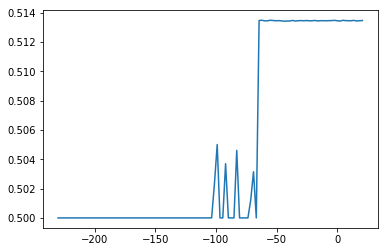

In [55]:
pyplot.plot([log(X) for X in grid['C']],test_score )

In [68]:
#считываем таблицу с тестовой выборкой
X_test = pd.read_csv('features_test.csv', index_col='match_id') 

In [69]:
#лучшее качество показал градиентный бустинг, пропуски заполняем значением -1
X_test.fillna(inplace=True, value =-1)

In [79]:
#обучаем классификатор на тренировочной выборке со значением параметра n_estimators=100, предсказываем значения для тестовой выборки
best_clf = GradientBoostingClassifier(n_estimators=100)
best_clf.fit(X=X,y=y)
pred = best_clf.predict_proba(X_test)

In [90]:
#формируем строку с результатами предсказаний
match_pred = ''
for i in range(len(pred[:, 1])): 
    match_pred +='{0}, {1}\n'.format(X_test.index[i], pred[:, 1][i])    

In [93]:
#выгружаем результаты предсказаний в файл
with open('pred.csv','w') as f:
    f.write(match_pred)